#**Linear Regression(SGD)**

### `SGD(Stochastic gradient descent)`

* Select a data point in the graph 
* Calculate derivative of sum of square residual wrt to `intercept (b)` and `slope (m)`
* Put the random value of the `intercept (b)` and `slope (m)` in the equation 
* Then multiply learning rate with a value we get , that will give us new `intercept (b)` and new `slope (m)`
* The above 4 procedure is same is same as gradient descent. the SGD is same as Gradient descent , except the only looks at one sample per step or small subset or mini batch , for each step 
* But gradient descent is not for the large dataset and it's only give efficient result for the small dataset 
* As SGD will randomly select a data point from the graph , it will test 1/3rd of the data points
* That will decrease the computation
* Whenever the new data comes , SGD easily use it to take another step for the parameter estimates without having to start from scratch.
* Whenever you look at contour graph,gradient descent is going straight to local minima i.e from bigger circle to center where global minima is present, derivative of `slope (m)`=0
, but the SGD it like a zig zag like structure and it reaches to the center 

---

  So these zig -zag can be removed by the `sgd with momentum` .
  We can use exponetial moving average so that zig -zag which we get can be removed.

---
Explanation of image : 
<br/>
<br/>
`Red Color` : Represent a Gradient Descent
<br/>
`Blue Color` : Represent a Stochastic Gradient Descent (SGD)
<br/>
<br/>

#### Plot of `Cost function or Loss function` Vs `Weight`

[<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAQqOOSdRStIW0EbUu342KVb9otNvHLJIfECqfciPUSru6ovgE&s"/>](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAQqOOSdRStIW0EbUu342KVb9otNvHLJIfECqfciPUSru6ovgE&s)

#### Contour plot

[<img src="https://www.holehouse.org/mlclass/17_Large_Scale_Machine_Learning_files/Image%20[16].png"/>](https://www.holehouse.org/mlclass/17_Large_Scale_Machine_Learning_files/Image%20[16].png)



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random
from sklearn.linear_model import SGDRegressor   

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [0]:
df = df[df.Target < 5]

In [0]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
x = df.MedInc
y = df.Target

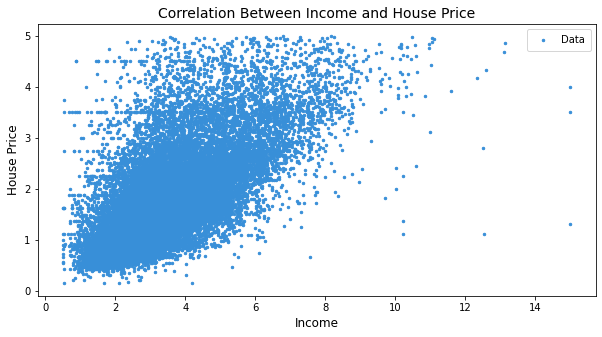

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,batch_size=3,lr = 0.02,epochs=100):
  
  m,b = 0,0;  ## initial the parameter
  mse = [];
  N = len(X)

  for i in range(epochs):
    random_batch = np.random.randint(0, len(X), batch_size) # random sample
      
    Xs = np.take(X, random_batch)
    ys = np.take(y, random_batch)
    N = len(Xs)
      
    f = ys - (m*Xs + b)           ## f(x) = (Observed - predicted)
      
    # Update m and b
    # we have to take derivative a function w.r.t b and m 
    # function is sum of square residual f(x) = (Y - (m*x+b))^2
    # MSE = sum of square residual / N

    m -= lr * (-2 * Xs.dot(f).sum() / N)    ## Multiply a derivative with learning rate (lr)
    b -= lr * (-2 * f.sum() / N)
      
    mse.append(mean_squared_error(y, m*X+b))
    print('> \t epoch=%d, lrate=%.3f, MSE = %.3f' % (i, lr, mean_squared_error(y, (m*X + b))))


  return m, b, mse

In [16]:
m, b,  mse = SGD(x,y, batch_size=3,lr=0.02, epochs=100)

> 	 epoch=0, lrate=0.020, MSE = 3.071
> 	 epoch=1, lrate=0.020, MSE = 0.604
> 	 epoch=2, lrate=0.020, MSE = 0.716
> 	 epoch=3, lrate=0.020, MSE = 0.638
> 	 epoch=4, lrate=0.020, MSE = 0.576
> 	 epoch=5, lrate=0.020, MSE = 0.811
> 	 epoch=6, lrate=0.020, MSE = 0.563
> 	 epoch=7, lrate=0.020, MSE = 0.591
> 	 epoch=8, lrate=0.020, MSE = 0.606
> 	 epoch=9, lrate=0.020, MSE = 0.578
> 	 epoch=10, lrate=0.020, MSE = 0.563
> 	 epoch=11, lrate=0.020, MSE = 0.698
> 	 epoch=12, lrate=0.020, MSE = 0.818
> 	 epoch=13, lrate=0.020, MSE = 0.582
> 	 epoch=14, lrate=0.020, MSE = 0.618
> 	 epoch=15, lrate=0.020, MSE = 0.570
> 	 epoch=16, lrate=0.020, MSE = 0.644
> 	 epoch=17, lrate=0.020, MSE = 0.563
> 	 epoch=18, lrate=0.020, MSE = 0.630
> 	 epoch=19, lrate=0.020, MSE = 0.585
> 	 epoch=20, lrate=0.020, MSE = 0.565
> 	 epoch=21, lrate=0.020, MSE = 0.562
> 	 epoch=22, lrate=0.020, MSE = 0.635
> 	 epoch=23, lrate=0.020, MSE = 0.561
> 	 epoch=24, lrate=0.020, MSE = 0.722
> 	 epoch=25, lrate=0.020, MSE = 0.

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5534828159761571


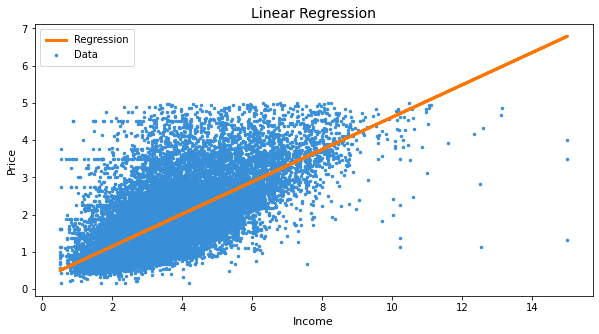

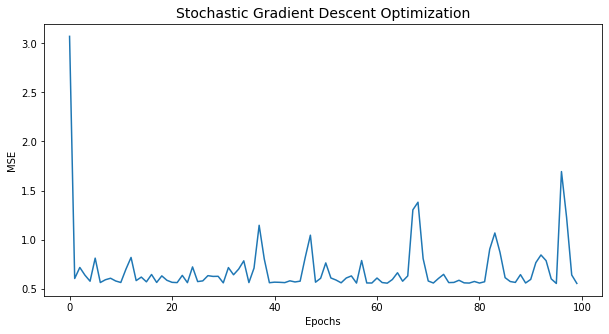

In [17]:
y_pred = m*x + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(x, y, label='Data', c='#388fd8', s=6)
plt.plot(x, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()


epochs = 100
plt.figure(figsize=(10,5))
plt.plot(range(epochs), mse)
plt.title('Stochastic Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

### Hope you guys like it :)